## 💻 UnpackAI DL201 Bootcamp - Week 2 - Skills: NLP

### 📕 Learning Objectives

* Reinforce the need for data processing not only for NLP but for most machine learning tasks.
* Review common data processing steps for NLP tasks.

### 📖 Concepts map
* Text fomratting
* Tokenization
* Stemming
* Lemmatization
* Stopwords

As in most machine learning tasks, data preprocessing is a key step in the process of training a model as faulty and poor quality data will result in poor performance. Text preprocessing in NLP represent the set of techniques that format and correct the structure of the text, remove unwanted characters and words, simplify and highlight the semantical meaninig of the text as well as transforms the text into a form that can be used by the machine learning algorithm.

Preprocessing tasks are more standarized than the ones use for Computer Vision and tabular data analysis, altough there are differences (because not all tasks require the same level of preprocessing),some steps are reused, often in the same order. Below there is a brief description of some of these tasks.

These tasks are part of the **morphological and lexical analysis** of the text, which are at the bottom of the NLP pipeline (text matching)

- Text Integration: Combining text from different sources into a single corpus.
- Text Formatting: Cleaning and formatting text.
    - Removal of punctuation.
    - Lowercasing.
    - Removal of stopwords.
    - Removal of numbers (or replace them with word numbers)
    - Removal of special characters (e.g. HTML tags, URLs, string patterns, etc.)
    - Removal of short words (e.g. words with less than 3 characters)
    - Removal of repeated words.
    - Removal of rare words (e.g. words that appear only once or only in a few documents).
- Text segementation: Splitting text into sentences.

Other processing steps operate at the **sematic level**, which affects the meaning of the text. (often rule-based)

- Spell checking: Correcting misspelled words.
- Grammar checking: Correcting grammatical errors.
- Stemming: Removing suffixes from words.
- Lemmatization: Simplifying words by using a dictionary of known words and roots.

Example of Stemming. From: https://i0.wp.com/trevorfox.com/wp-content/uploads/2018/07/stemming-example.png

![](https://i0.wp.com/trevorfox.com/wp-content/uploads/2018/07/stemming-example.png?fit=500%2C605&ssl=1)

Comparison with lemmatization. From: https://medium.com/swlh/introduction-to-stemming-vs-lemmatization-nlp-8c69eb43ecfe

![](https://tse3-mm.cn.bing.net/th/id/OIP-C.2K4VxxRtewNw4iP-Kh5Z7QHaEH?pid=ImgDet&rs=1)

Additionally, text enrichment can be applied providing more semantics to the original text with data that we didn't have before. (machine-learning, learn-based)
- POS Tag: Part of speech tagging.
- Entity Recognition: Recognizing named entities.
- Entity relation extraction: Extracting relations between named entities.
- Dependency parsing: Parsing the sentence into a tree structure.

POS Tagging. From: https://www.researchgate.net/publication/337460636_Unpacking_the_Smart_Mobility_Concept_in_the_Dutch_Context_Based_on_a_Text_Mining_Approach

![](https://www.researchgate.net/publication/337460636/figure/download/fig1/AS:828223747284992@1574475337385/Example-of-part-of-speech-POS-tagging-and-lemmatization-for-two-example-sentences-The.ppm)

Entity recognition and dependency parsing. From: https://stanfordnlp.github.io/CoreNLP/

![](https://stanfordnlp.github.io/CoreNLP/assets/images/ner.png)

Entity relation-extraction. From: https://www.mdpi.com/2079-9292/9/10/1637

![](https://www.mdpi.com/electronics/electronics-09-01637/article_deploy/html/images/electronics-09-01637-g001.png)

Then we have text vectorization, which is the process of converting the text into a vector representation. This step is required to train a machine learning model.

Vectorized representations of text are usually obtained via:
- Bag of words: A vector representation of the text is obtained by counting the number of times each word appears in the text.
- TF-IDF: A vector representation of the text is obtained by counting the number of times each word appears in the text and then normalizing the counts by the number of documents in which the word appears.
- Word embeddings: A vector representation of the text is obtained by using a word embedding model to represent the text.
    - Word2Vec.
    - Bert.

From here the vectorized representation becomes the input for the machine learning algorithm. Depending of the algorithm, the input can be:
- Classification: The input is a vector representation of the text and the output is a class label.
- Regression: The input is a vector representation of the text and the output is a real number.
- Clustering: The input is a vector representation of the text and the output is a cluster label.
- Recommendation: The input is a vector representation of the text and the output is a list of recommendations.
- Sentiment analysis: The input is a vector representation of the text and the output is a real number.
- Topic modeling: The input is a vector representation of the text and the output is a list of topics.
- Text summarization: The input is a vector representation of the text and the output is a list of sentences.
- Text translation: The input is a vector representation of the text and the output is a list of translations.

### Revisit the previous example

Implement a few of the preprocessing steps mentioned above.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import torch
import requests
from transformers import BertTokenizer, BertModel
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Download dependencies
nltk.download('stopwords')
nltk.download('wordnet')
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification mode

In [3]:
# Load a sample text, from the provided url into a dataframe
response = requests.get('http://www.textfiles.com/stories/alad10.txt')
sample_text = response.text
sentences = sample_text.split('\n')                        # Split text into sentences
df = pd.DataFrame(sentences, columns=['sentence'])

In [4]:
# Text cleaning (morphological changes)
df['sentence'] = df['sentence'].str.lower()                 # Lowercase
df = df[df['sentence'].str.split().str.len() > 3]           # Remove short sentences
df['sentence'] = df['sentence'].str.replace('[^\w\s]','')   # Remove punctuation
max_len = df['sentence'].str.len().max()                    # longest sentence
df['sentence'].head(5)                                    

C:\Users\lenis\AppData\Local\Temp/ipykernel_5424/1803514917.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sentence'] = df['sentence'].str.replace('[^\w\s]','')   # Remove punctuation


1                     aladdin and the wonderful lamp\r
4    there once lived a poor tailor who had a son c...
5    a careless idle boy who would do nothing but p...
6    the streets with little idle boys like himself...
7    father that he died yet in spite of his mother...
Name: sentence, dtype: object

In [5]:
# Remove Stopwords
eng_stopwords = stopwords.words('english')
print(eng_stopwords[-10:])
df['sentence'] = df['sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in eng_stopwords]))
df['sentence'].head(5) 

['shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]


1                           aladdin wonderful lamp
4             lived poor tailor son called aladdin
5    careless idle boy would nothing play day long
6            streets little idle boys like grieved
7      father died yet spite mothers tears prayers
Name: sentence, dtype: object

In [ ]:
# Apply lemmatization
lemmatizer = WordNetLemmatizer()
df['sentence'] = df['sentence'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
df['sentence'].head(5) 

In [6]:
# Apply stemming
stemmer = PorterStemmer()
df['sentence'] = df['sentence'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df['sentence'].head(5)

1                          aladdin wonder lamp
4            live poor tailor son call aladdin
5    careless idl boy would noth play day long
6              street littl idl boy like griev
7      father die yet spite mother tear prayer
Name: sentence, dtype: object

In [7]:
# Tokenize the sentences, add tokens ids
tokens_df = df.copy()
tokens_df['tokenized_sentence'] = tokens_df['sentence'].apply(bert_tokenizer.tokenize)
tokens_df['numericalized_sentence'] = tokens_df['tokenized_sentence'].apply(bert_tokenizer.convert_tokens_to_ids)
tokens_df.sample(10)

,sentence,tokenized_sentence,numericalized_sentence
448,pleasur hall spoilt want roc egg,"[pleas, ##ur, hall, spoil, ##t, want, roc, egg]","[22512, 3126, 2534, 27594, 2102, 2215, 21326, ..."
55,come nich terrac stand light lamp pour,"[come, nic, ##h, terra, ##c, stand, light, lam...","[2272, 27969, 2232, 14403, 2278, 3233, 2422, 1..."
236,go see,"[go, see]","[2175, 2156]"
302,offer exchang fine new lamp old one anoth slave,"[offer, ex, ##chang, fine, new, lamp, old, one...","[3749, 4654, 22305, 2986, 2047, 10437, 2214, 2..."
419,african magician younger brother possibl,"[african, magician, younger, brother, po, ##ss...","[3060, 16669, 3920, 2567, 13433, 18719, 16558]"
87,child said noth hous spun,"[child, said, not, ##h, ho, ##us, spun]","[2775, 2056, 2025, 2232, 7570, 2271, 7455]"
178,sigh deepli last told mother night,"[sigh, deep, ##li, last, told, mother, night]","[6682, 2784, 3669, 2197, 2409, 2388, 2305]"
384,smile lead believ forgotten,"[smile, lead, bel, ##ie, ##v, forgotten]","[2868, 2599, 19337, 2666, 2615, 6404]"
158,princess command tonight bring hither,"[princess, command, tonight, bring, hit, ##her]","[4615, 3094, 3892, 3288, 2718, 5886]"
379,use violenc aladdin comfort left,"[use, vi, ##ole, ##nc, ala, ##ddin, comfort, l...","[2224, 6819, 9890, 12273, 21862, 18277, 7216, ..."


In [8]:
# Add the [CLS] and [SEP] special tokens and padding to the numericalized sentences on the dataframe
tokens_df['numericalized_sentence'] = tokens_df['numericalized_sentence'].apply(lambda x: [bert_tokenizer.cls_token_id] + x + [bert_tokenizer.sep_token_id])
tokens_df['numericalized_sentence'] = tokens_df['numericalized_sentence'].apply(lambda x: x + [bert_tokenizer.pad_token_id] * (max_len - len(x)))
tokens_df['numericalized_sentence'].sample(10)

31     [101, 16669, 4139, 9850, 21025, 4103, 2140, 44...
72     [101, 13219, 21862, 18277, 16405, 14536, 2891,...
351    [101, 2275, 6203, 2564, 3332, 2179, 102, 0, 0,...
69     [101, 3894, 2338, 4687, 10437, 2052, 2191, 102...
250    [101, 2056, 7499, 17935, 3775, 7782, 4487, 131...
433    [101, 2146, 4078, 4313, 2156, 27596, 2741, 227...
411    [101, 2684, 4148, 2298, 14548, 3239, 102, 0, 0...
203    [101, 21459, 3669, 4377, 2425, 26751, 3437, 10...
168    [101, 28616, 2121, 2305, 2166, 21862, 18277, 3...
115    [101, 2071, 2444, 2302, 3214, 3198, 9388, 4360...
Name: numericalized_sentence, dtype: object

In [9]:
# Extract encoded value to a Tensor
numericalized_sentences = tokens_df['numericalized_sentence'].values
numericalized_sentences = [list(x) for x in numericalized_sentences]
numericalized_sentences = np.array(numericalized_sentences)
numericalized_sentences = torch.from_numpy(numericalized_sentences)
print(numericalized_sentences.shape)

torch.Size([447, 76])


In [10]:
# Use a fourth of the sentences to reduce memory usage
numericalized_sentences = numericalized_sentences[:len(numericalized_sentences)//4, :]
print(numericalized_sentences.shape)

torch.Size([223, 76])


In [11]:
# Encode the numericalized sentences using BERT
encoded_sentences = bert_model(numericalized_sentences)[0]
encoded_sentences = encoded_sentences.detach().numpy()
print(encoded_sentences.shape)

(223, 76, 768)


In [12]:
# Add embedings of each sentence
encoded_sentences = np.sum(encoded_sentences, axis=1)
print(encoded_sentences.shape)

(223, 768)


In [26]:
# Use PCA to reduce the embedding dimensionality to 3
pca = PCA(n_components=3)
pca.fit(encoded_sentences)
reduced_embeddings = pca.transform(encoded_sentences)
print(reduced_embeddings.shape)

(223, 3)


C:\Users\lenis\AppData\Local\Temp/ipykernel_5424/1060887147.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


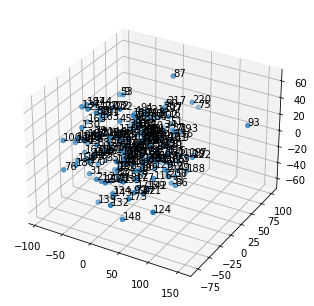

In [27]:
# plot 3D embeddings, add tight axis
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], reduced_embeddings[:, 2])
ax.grid(True)


# Add a label to each data point
for i in range(len(reduced_embeddings)):
    ax.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], reduced_embeddings[i, 2], f'{i}')
    

plt.show()

In [36]:
# Print sentences that appear distinct in the embeddings
print(f"- Sentence 76: {df['sentence'].iloc[76]}")
print(f"- Sentence 220: {df['sentence'].iloc[220]}")

- Sentence 58: went home faint threshold came
- Sentence 124: middl shall build larg hall dome four wall


### Exercise: experiment!

* Combine text from at least two different sources.
* Try different nlp libraries
* Perform an expanded NLP pipeline (check spelling, POS tagging, entity recognition, dependency parsing, etc.)
